In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
        # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manokwari
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | vanavara
Processing Record 4 of Set 1 | emerald
Processing Record 5 of Set 1 | san lawrenz
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | tshikapa
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | zolotinka
City not found. Skipping...
Processing Record 13 of Set 1 | kawalu
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | totskoye
Processing Record 18 of Set 1 | puerto escondido
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | meulaboh
Processing Record 21 of Set 1 | aleksandrov gay
Processing Record 2

Processing Record 35 of Set 4 | braganca
Processing Record 36 of Set 4 | ankazoabo
Processing Record 37 of Set 4 | ouadda
Processing Record 38 of Set 4 | bilma
Processing Record 39 of Set 4 | amahai
Processing Record 40 of Set 4 | college
Processing Record 41 of Set 4 | abatskoye
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | kloulklubed
Processing Record 45 of Set 4 | port moresby
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | gondanglegi
Processing Record 49 of Set 4 | lampazos de naranjo
Processing Record 50 of Set 4 | burns lake
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | balagansk
Processing Record 3 of Set 5 | kapit
Processing Record 4 of Set 5 | mzimba
Processing Record 5 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 5 | taoudenni
Processing Record 7 of Set 5 | jalu
Processing Record 8 of Set 5 | kiama

Processing Record 24 of Set 8 | macenta
Processing Record 25 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 26 of Set 8 | lasa
Processing Record 27 of Set 8 | margate
Processing Record 28 of Set 8 | dundee
Processing Record 29 of Set 8 | cukai
Processing Record 30 of Set 8 | marzuq
Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | khawhai
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | turukhansk
Processing Record 35 of Set 8 | paracatu
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | kampot
Processing Record 38 of Set 8 | great falls
Processing Record 39 of Set 8 | shasta lake
Processing Record 40 of Set 8 | tuzha
Processing Record 41 of Set 8 | antalaha
Processing Record 42 of Set 8 | tamandare
Processing Record 43 of Set 8 | kampene
Processing Record 44 of Set 8 | belmonte
Processing Record 45 of Set 8 | port hardy
Processing Record 46 of Set 8 | tahoua
Processing Record 47 of Set 8 | paratinga
P

Processing Record 15 of Set 12 | gheorgheni
Processing Record 16 of Set 12 | gijon
Processing Record 17 of Set 12 | kanker
Processing Record 18 of Set 12 | parker
Processing Record 19 of Set 12 | mazagao
Processing Record 20 of Set 12 | iqaluit
Processing Record 21 of Set 12 | khowst
Processing Record 22 of Set 12 | palasbari
Processing Record 23 of Set 12 | ijaki
City not found. Skipping...
Processing Record 24 of Set 12 | coos bay
Processing Record 25 of Set 12 | tooele
Processing Record 26 of Set 12 | dillon
Processing Record 27 of Set 12 | otane
Processing Record 28 of Set 12 | kutum
Processing Record 29 of Set 12 | manta
Processing Record 30 of Set 12 | tulum
Processing Record 31 of Set 12 | altay
Processing Record 32 of Set 12 | ostersund
Processing Record 33 of Set 12 | anadyr
Processing Record 34 of Set 12 | santa vitoria do palmar
Processing Record 35 of Set 12 | warrington
Processing Record 36 of Set 12 | debre tabor
Processing Record 37 of Set 12 | kupang
Processing Record 3

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manokwari,-0.8667,134.0833,79.14,73,100,10.58,ID,2022-01-31 00:34:53
1,Sisimiut,66.9395,-53.6735,2.32,75,57,16.26,GL,2022-01-31 00:37:44
2,Vanavara,60.3400,102.2797,-16.65,100,100,2.06,RU,2022-01-31 00:37:45
3,Emerald,-23.5333,148.1667,86.14,54,40,9.22,AU,2022-01-31 00:37:45
4,San Lawrenz,36.0553,14.2040,55.85,79,24,3.00,MT,2022-01-31 00:37:46
5,Nikolskoye,59.7035,30.7861,27.39,97,100,5.19,RU,2022-01-31 00:37:46
6,Ushuaia,-54.8000,-68.3000,46.06,61,40,27.63,AR,2022-01-31 00:34:12
7,Hobart,-42.8794,147.3294,81.01,57,20,1.01,AU,2022-01-31 00:37:47
8,Tshikapa,-6.4167,20.8000,70.36,94,100,1.21,CD,2022-01-31 00:37:47
9,Hilo,19.7297,-155.0900,80.33,60,40,8.05,US,2022-01-31 00:37:00


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

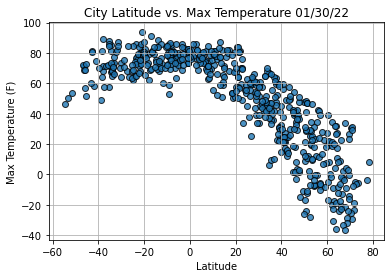

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(humidity,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Humidity vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

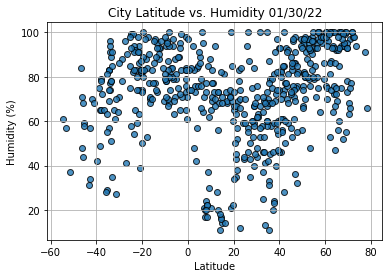

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

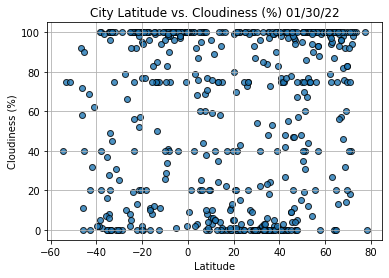

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

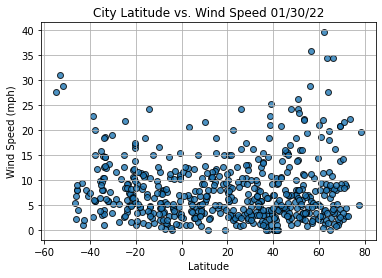

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Lat                       55.7435
Lng                      -97.8558
Max Temp                    -0.24
Humidity                       85
Cloudiness                     20
Wind Speed                   3.44
Country                        CA
Date          2022-01-31 00:37:50
Name: 13, dtype: object

In [43]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
553     True
554     True
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Sisimiut,66.9395,-53.6735,2.32,75,57,16.26,GL,2022-01-31 00:37:44
2,Vanavara,60.3400,102.2797,-16.65,100,100,2.06,RU,2022-01-31 00:37:45
4,San Lawrenz,36.0553,14.2040,55.85,79,24,3.00,MT,2022-01-31 00:37:46
5,Nikolskoye,59.7035,30.7861,27.39,97,100,5.19,RU,2022-01-31 00:37:46
9,Hilo,19.7297,-155.0900,80.33,60,40,8.05,US,2022-01-31 00:37:00


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

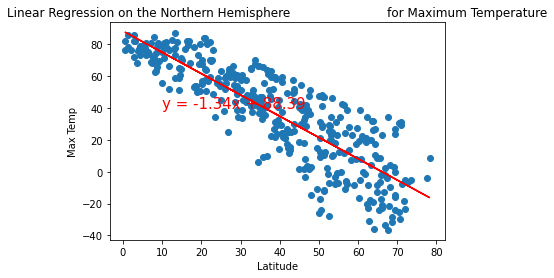

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

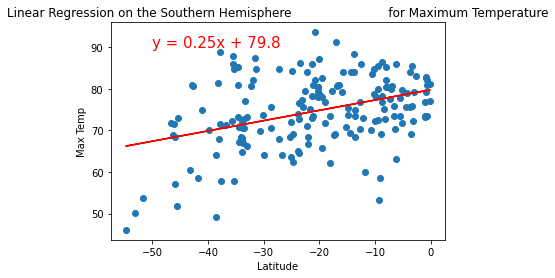

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

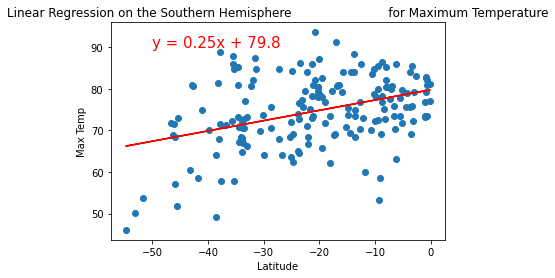

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

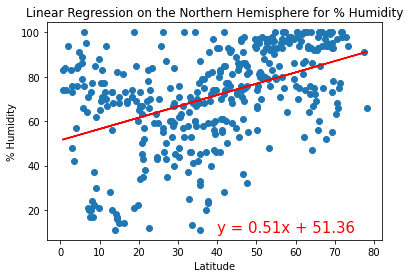

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

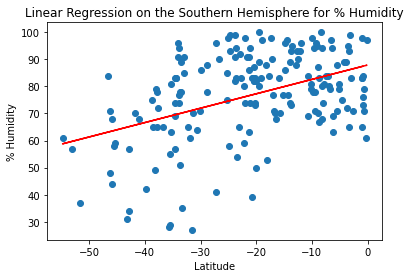

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


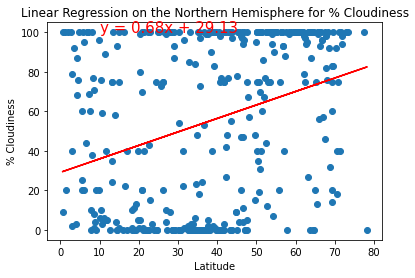

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,100))

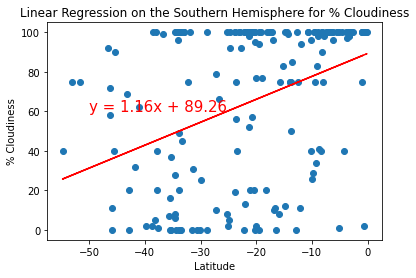

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

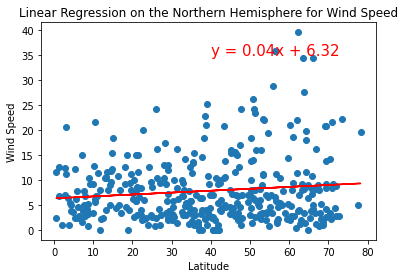

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

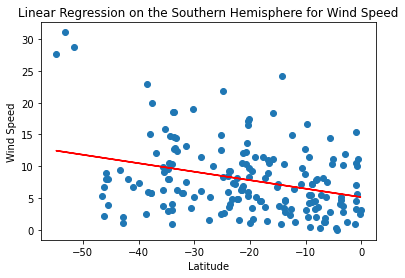

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))